# 基礎班問答 13:30 - 14:30

問1. Class內如果有多個函式，如何使用共同變數，有沒有使用技巧@@?

In [ ]:
class Cls:
    def func1(self, a, b):
        Cls.func1_result = a + b
        return a + b

    def func2(self):
        return Cls.func1_result
        

In [ ]:
globals()['a'] = 1

In [ ]:
a

## 問2.

```python 

@app.callback(                              
        Output(component_id="my-output", component_property="children"),   #Output("my-output", "children"),
        Output(component_id="my-output-1", component_property="children"),
        Input(component_id="my-button", component_property="n_clicks"),
        # Input(component_id="my-button-1", component_property="n_clicks")  #Input("my-button-1", "n_clicks")
)  #@表裝飾器，下面一行須直接接函式
def click_button(n):  #兩個input，()內就有兩個代數
    return n, n+10
 
為什麼def function跟@app.callback中間不能有空一行，這個原理是什麼
 
@app.callback(
    [Output('previous_fn_data', 'data')],
    [Input('fn_report', 'data')]
)
 
def save_data(data):
 
    return [data]
```
這段程式實測上還是可以執行
 
兩段程式的差異點是什麼???

答: 在我電腦上都可以執行, 也許是 Sam 有什麼考量

## 問3 dash 可以顯示本機路徑的圖檔嗎??

把圖片放到 assets/ 資料夾內
然後用
```python
html.Img(src=...)
```
將圖呈現出來

其它地方的圖片請先手動或用程式 copy 到 assets folder 裡

```python
import shutil

shutil.copyfile(src, dst)
```


# 影像班問答 14:30 - 15: 30

In [ ]:
開啟檔案

## PIL 作法

In [ ]:
from PIL import Image
img = Image.open('assets/A229.png')
img

In [ ]:
import cv2

In [ ]:
img = cv2.imread('assets/A229.png')
type(img)

In [ ]:
cv2.imshow('img1', img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

### 圖片縮放

In [52]:
from PIL import Image
original = Image.open('assets/A229.png')

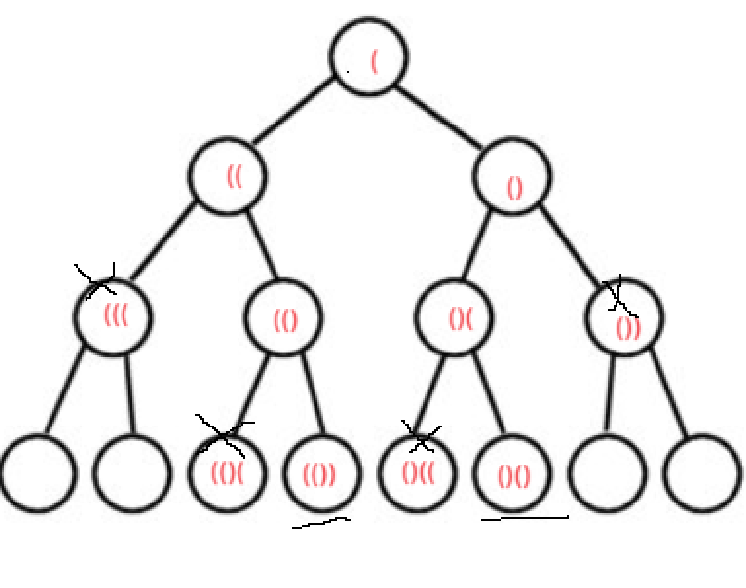

In [53]:
original

In [ ]:
original.size

In [ ]:
img = original.copy()
img.thumbnail((50, 50))
img
img.size

In [ ]:
image = original.copy()
img.thumbnail((1000, 1000))
img.size

In [ ]:
img.resize((1000, 1000))

## 影像裁切

In [ ]:
from plotly import express as px
img = original.copy()


In [ ]:
px.imshow(img)

In [ ]:
# (312, 3) 到 (422, 120) 的正方型
left = 312
upper = 3
right = 422
lower = 120

img.crop((left, upper, right, lower))



## 圖層操作

In [66]:
bgr = cv2.imread('assets/A229.png')

In [67]:
bgr.shape   # BGR

(588, 746, 3)

In [68]:
px.imshow(bgr)

In [69]:
original[60][373]

array([120, 115, 243], dtype=uint8)

In [70]:
## BGR = 120, 115, 243
## RGB = 243, 115, 120
bgr[60][373][::-1]

array([243, 115, 120], dtype=uint8)

In [72]:
rgb = original[:,:,::-1]
px.imshow(rgb)

In [74]:
# (312, 3) 到 (422, 120) 的正方型
cropped = rgb[3:120, 312:422]
px.imshow(cropped)

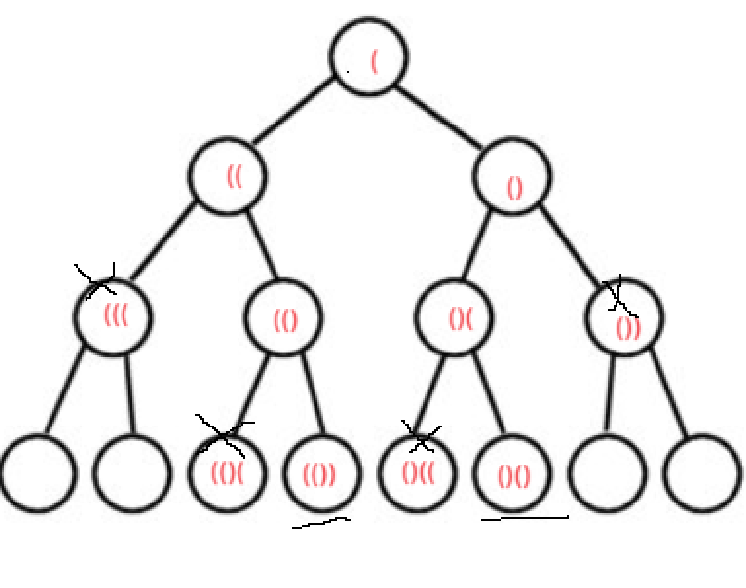

In [91]:
from PIL import Image
original = Image.open('assets/A229.png')
original

## 圖片旋轉

(746, 588)


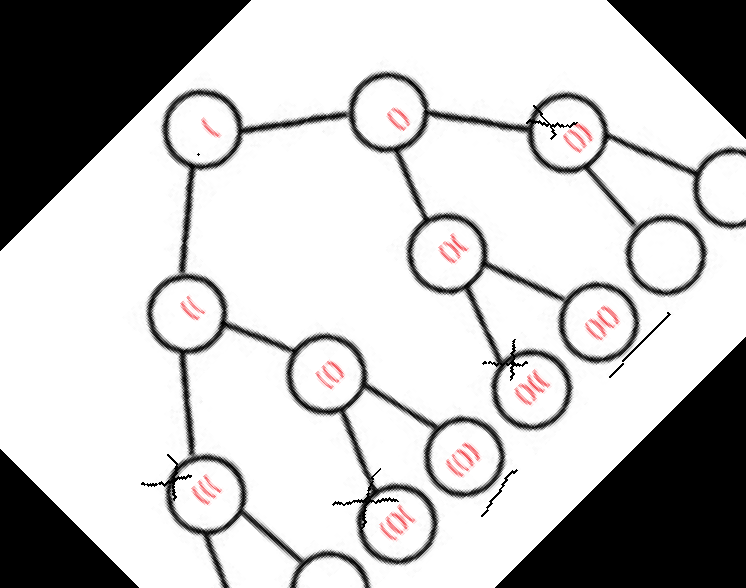

In [97]:
img = original.copy()
print(img.rotate(45, fillcolor='black').size)
img.rotate(45, fillcolor='black')

(944, 944)


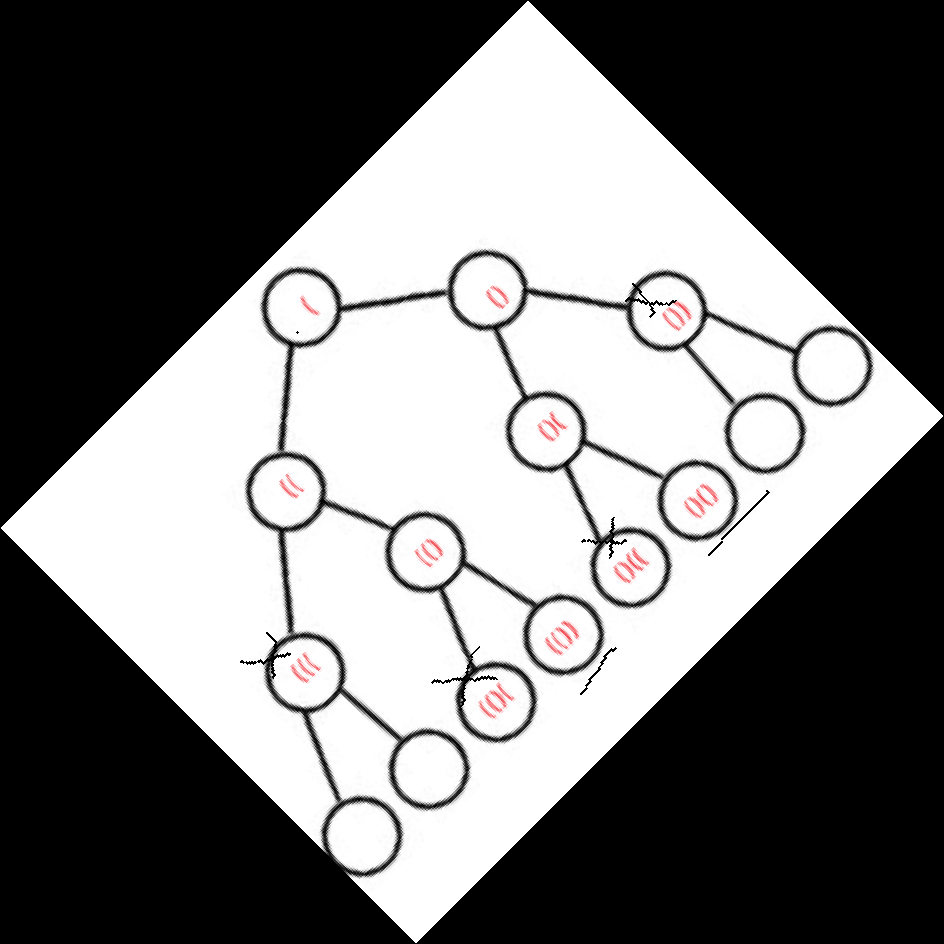

In [95]:
img = original.copy()
print(img.rotate(45, expand=True, fillcolor='black').size)
img.rotate(45, expand=True, fillcolor='black')

# cv2 轉 pillow

In [104]:
original = cv2.imread('assets/A229.png')

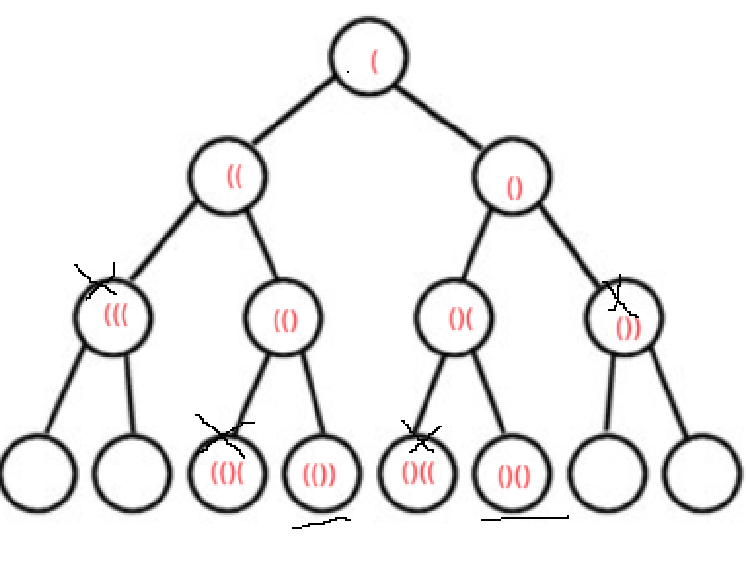

In [105]:
img = Image.fromarray(original[:, :, ::-1])
img

## pillow 轉 CV2

In [126]:
import numpy as np

In [134]:
img = Image.open('assets/A229.png').convert('RGB')

In [135]:
cv2_img = np.array(img)[:,:, ::-1]

In [136]:
cv2.imshow('title', cv2_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 綜合問答 15:30 -

問1. 要怎麼有效的判斷趨勢線的轉變? 現在我想到的只有去計算出不同時段資料的角度和斜率


我能想到的關鍵字: 加速度,  concavity

In [144]:
import numpy as np
a = np.array([1, 2, 12, 200, 400])
speed = a[1:] - a[:-1]
acceleration = speed[1:] - speed[:-1]
print(speed)
print(acceleration)

[  1  10 188 200]
[  9 178  12]


# 練習

## 總合

In [ ]:
a = [1, 2, 3, 4]

### for loop 作法

In [ ]:
total = 0
for val in a:
    total = total + val
total

### python 作法

In [ ]:
sum(a)

### numpy array 作法

In [145]:
import numpy as np

In [ ]:
a = np.array(a)
a.sum()

### numpy Universal function 作法

In [ ]:
np.sum(a)

## 加法

In [ ]:
a = [1, 2, 3, 4]
b = [3, 5, 7, 9]

# 預期結果 4, 7, 10, 13

### python 作法

In [ ]:
result = []

for index in range(0, 4):
    result.append(a[index] + b[index])
print(result)

### numpy 作法

In [ ]:
a = np.array(a)
b = np.array(b)

a + b

## indexing
取出 index 1

In [ ]:
a = [1, 2, 3, 4]

a[1]

## Slicing

In [146]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]

### for loop 作法

In [147]:
result = []
for index in range(1, 7):
    result.append(a[index])
result

[2, 3, 4, 5, 6, 7]

### slicing 作法

In [148]:
a[1: 7]

[2, 3, 4, 5, 6, 7]

### numpy slicing

In [149]:
a = np.array(a)
a[1: 7]

array([2, 3, 4, 5, 6, 7])

## 2D slicing

In [151]:
a = [
    [1,  2,  3 , 4,  5],
    [6,  7,  8,  9,  10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
]
    

### for loop 作法

In [154]:
result= [[], [], [],]

for x in range(3):
    for y in range(3):
        result[x].append(a[x + 1][y + 1])
print(result)

[[7, 8, 9], [12, 13, 14], [17, 18, 19]]


### python 作法

In [157]:
result = [
    a[1][1:4],
    a[2][1:4],
    a[3][1:4],
]
result

[[7, 8, 9], [12, 13, 14], [17, 18, 19]]

In [ ]:
### numpy 作法

In [161]:
a = np.array(a)

## 一元一次方程式

$$
f(x) = 2a + 4
$$

```
markdown 寫法
$$
f(x) = 2a + 4
$$

```

In [ ]:
a = [1, 2, 3, 4]

## 一元二次方程式
$$
f(a) = 2a^2 + 3a + 1
$$

In [ ]:
a = [1, 2, 3, 4]

## 二元一次方程式
$$
f(a, b) = 2a + 3b + 5
$$

In [ ]:
a = [1, 2, 3, 4]
b = [3, 5, 7, 9]

## 三角函數角度 (degree) 轉弧度(radian) 

In [ ]:
degrees = [0, 30, 45, 60, 90, 135, 180, 225]

In [ ]:
radians = [0 , 0.52359878, 0.78539816, 1.04719755, 1.57079633, 2.35619449, 3.14159265, 3.92699082]

## 統計

In [ ]:
data = numpy.random.normal(loc=5, scale=15, size=100)